In [100]:
# Add relevant Jupyter notebook extensions 

In [101]:
# You can double-check your Python path like this...
import sys  
print(sys.path)
sys.path.insert(1, r'C:\Users\finla\OneDrive\Desktop\Oxford\Year 3\B1 Coding\Scientific Computing\Repository\B1-Scientific-Coding\uuv_mission')
import sys
print(sys.path)

['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2032.0_x64__qbz5n2kfra8p0\\python312.zip', 'C:\\Users\\finla\\OneDrive\\Desktop\\Oxford\\Year 3\\B1 Coding\\Scientific Computing\\Repository\\B1-Scientific-Coding\\uuv_mission', 'C:\\Users\\finla\\OneDrive\\Desktop\\Oxford\\Year 3\\B1 Coding\\Scientific Computing\\Repository\\B1-Scientific-Coding\\uuv_mission', 'C:\\Users\\finla\\OneDrive\\Desktop\\Oxford\\Year 3\\B1 Coding\\Scientific Computing\\Repository\\B1-Scientific-Coding\\uuv_mission', 'C:\\Users\\finla\\OneDrive\\Desktop\\Oxford\\Year 3\\B1 Coding\\Scientific Computing\\Repository\\B1-Scientific-Coding\\uuv_mission', 'C:\\Users\\finla\\OneDrive\\Desktop\\Oxford\\Year 3\\B1 Coding\\Scientific Computing\\Repository\\B1-Scientific-Coding\\uuv_mission', 'C:\\Users\\finla\\OneDrive\\Desktop\\Oxford\\Year 3\\B1 Coding\\Scientific Computing\\Repository\\B1-Scientific-Coding\\uuv_mission', 'C:\\Users\\finla\\OneDrive\\Desktop\\Oxford\\Year 3\\B1 Coding\\Scient

# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

[0.15, 0.6]


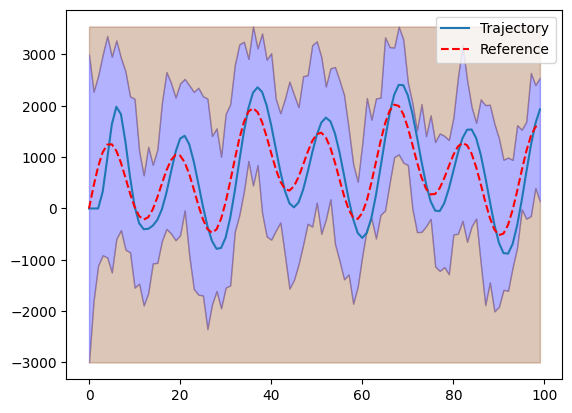

[np.float64(0.0), np.float64(0.0)]


ValueError: operands could not be broadcast together with shapes (100,2) (100,) 

In [103]:
# Ensure the dynamic module is reloaded to reflect any changes
import importlib
import dynamic
import terrain
importlib.reload(dynamic)
importlib.reload(terrain)
from dynamic import Submarine, ClosedLoop, Mission
from terrain import write_mission_to_csv
import numpy as np

controller = [0.15,0.6]    #first value is Kp and second value is Kd
duration = 100
scale = 1000

sub = Submarine()
# Instantiate your controller (depending on your implementation)
closed_loop = ClosedLoop(sub, controller)
missions = Mission.random_mission(duration,scale)
terrain.write_mission_to_csv(missions,r"C:\Users\finla\OneDrive\Desktop\Oxford\Year 3\B1 Coding\Scientific Computing\Repository\B1-Scientific-Coding\data\mission.csv")
mission = Mission.from_csv(r"C:\Users\finla\OneDrive\Desktop\Oxford\Year 3\B1 Coding\Scientific Computing\Repository\B1-Scientific-Coding\data\mission.csv") # You must implement this method in the Mission class

trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)

#Now we look to optimise the controller
#We need a way to evaluate the performance, by taking average distance from reference
#We can then graph this to find optimal values

# Define the range of Kp and Kd values
kp_values = np.arange(0, 1.05, 0.05)
kd_values = np.arange(0, 1.05, 0.05)

# Initialize variables to store the best controller and its performance
best_controller = None
best_performance = float('inf')

# Iterate through all combinations of Kp and Kd
for kp in kp_values:
    for kd in kd_values:
        controller = [kp, kd]
        closed_loop = ClosedLoop(sub, controller)
        trajectory = closed_loop.simulate_with_random_disturbances(mission)
        
        # Evaluate the performance (e.g., average distance from reference)
        performance = np.mean(np.abs(trajectory.position - mission.reference))
        
        # Update the best controller if the current one is better
        if performance < best_performance:
            best_performance = performance
            best_controller = controller

print(f"Best controller: Kp = {best_controller[0]}, Kd = {best_controller[1]}")
print(f"Best performance: {best_performance}")